In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.io import read_image, ImageReadMode
from torch.utils.data import Dataset, DataLoader
import cv2
import os
import time
from copy import deepcopy
import matplotlib.pyplot as plt
import os

from utils import *
from PATH import *
from data import *
from train import *
from models import *

from torchinfo import summary

In [2]:
dataset = KITTI_SEM(KITTI_SEM_TRAIN_RGB_PATHS, KITTI_SEM_TRAIN_LABEL_PATHS, device=torch.device("cpu"), original=True)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)
for i, d in enumerate(dataloader):
    print(d['rgb'].shape, d['label'].shape)
    if i > 5:
        break

torch.Size([4, 3, 200, 640]) torch.Size([4, 200, 640])
torch.Size([4, 3, 200, 640]) torch.Size([4, 200, 640])
torch.Size([4, 3, 200, 640]) torch.Size([4, 200, 640])
torch.Size([4, 3, 200, 640]) torch.Size([4, 200, 640])
torch.Size([4, 3, 200, 640]) torch.Size([4, 200, 640])
torch.Size([4, 3, 200, 640]) torch.Size([4, 200, 640])
torch.Size([4, 3, 200, 640]) torch.Size([4, 200, 640])


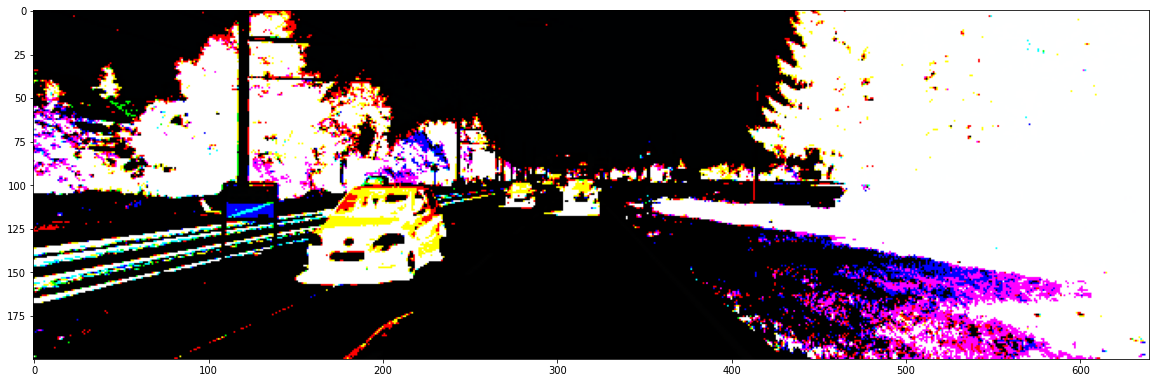

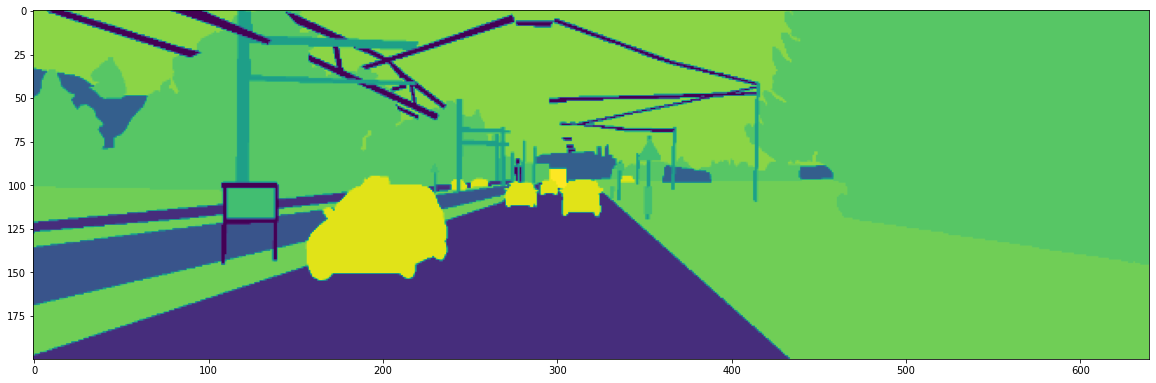

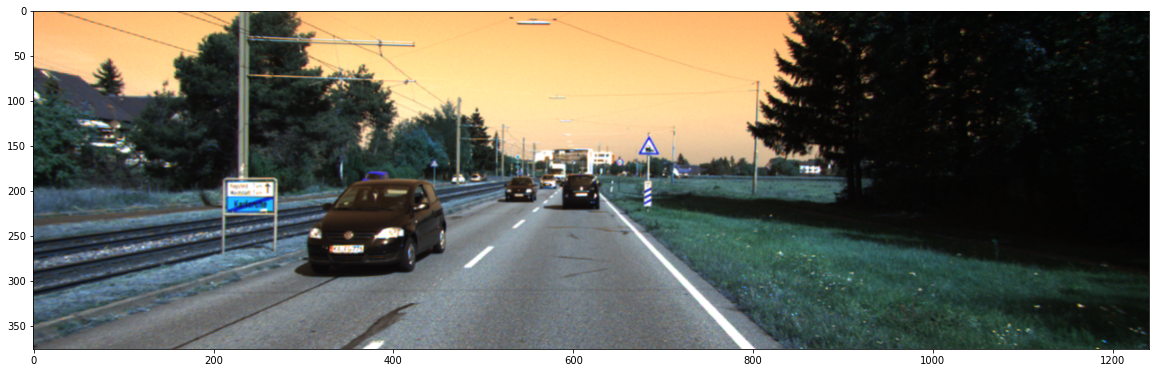

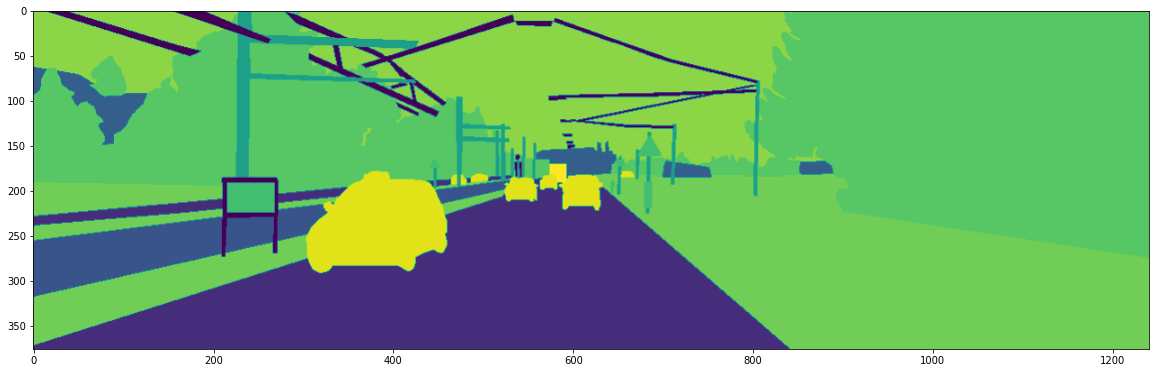

In [3]:
dataset.example(37)

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27]
torch.Size([1, 3, 200, 640])
torch.Size([21, 200, 640])


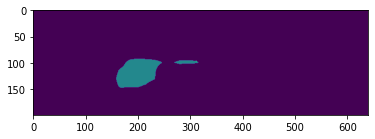

In [4]:
m = RegSegModel()
m = m.cpu()
m.eval()

data = dataset[37]
img = data['rgb'].cpu().unsqueeze(0)
print(np.unique(data['label'].cpu().numpy()))
print(img.shape)

pred = m.base(img)['out'].squeeze()
print(pred.shape)
pred = pred.argmax(0)
pred = pred.squeeze().to(torch.long).cpu().numpy()

plt.figure()
plt.imshow(pred)

In [5]:
loss_fn = nn.CrossEntropyLoss()

y = torch.randint(33, (10, 480, 360))
x = torch.randn(10, 33, 480, 360)
print(x.shape, y.shape)
z = loss_fn(x, y)
z

torch.Size([10, 33, 480, 360]) torch.Size([10, 480, 360])


tensor(3.9718)